In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_customers = pd.read_csv('CUSTOMERS.csv')
df_offers = pd.read_csv('OFFERS.csv')

In [4]:
#copy to create the heatmap and replace categorical variables with frequency counts
df_offers_copy=df_offers.copy()

In [5]:
#copy to create graphical representations
df_graph=df_offers.copy()

In [6]:
df_offers

,user_id,year,week_number,channel,promotion_type,purchase,total_spend,coupon_used
0,46732,2020,43,App,Free pastry,t,2.771466,f
1,46733,2020,43,Text,20% discount,f,NaN,NaN
2,46734,2020,43,Text,No notifications,f,NaN,NaN
3,46735,2020,43,Text,Reminder only,t,13.355434,NaN
4,46736,2020,43,App,20% discount,t,1.415059,t
...,...,...,...,...,...,...,...,...
15588243,46727,2020,43,App,10% discount,f,NaN,NaN
15588244,46728,2020,43,Email,Free pastry,f,NaN,NaN
15588245,46729,2020,43,App,10% discount,t,21.941954,f
15588246,46730,2020,43,App,20% discount,t,48.383710,f


In [7]:
df_offers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15588248 entries, 0 to 15588247
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int64  
 1   year            int64  
 2   week_number     int64  
 3   channel         object 
 4   promotion_type  object 
 5   purchase        object 
 6   total_spend     float64
 7   coupon_used     object 
dtypes: float64(1), int64(3), object(4)
memory usage: 951.4+ MB


In [8]:
#Cleaning the dataset - replacing NaN in total_spend with 0 and NaN in coupon_used with f. 
df_offers_copy["total_spend"] = df_offers_copy["total_spend"].fillna(0)
df_offers_copy['coupon_used'] = df_offers_copy['coupon_used'].replace(np.nan, 'f')
df_offers_copy

,user_id,year,week_number,channel,promotion_type,purchase,total_spend,coupon_used
0,46732,2020,43,App,Free pastry,t,2.771466,f
1,46733,2020,43,Text,20% discount,f,0.000000,f
2,46734,2020,43,Text,No notifications,f,0.000000,f
3,46735,2020,43,Text,Reminder only,t,13.355434,f
4,46736,2020,43,App,20% discount,t,1.415059,t
...,...,...,...,...,...,...,...,...
15588243,46727,2020,43,App,10% discount,f,0.000000,f
15588244,46728,2020,43,Email,Free pastry,f,0.000000,f
15588245,46729,2020,43,App,10% discount,t,21.941954,f
15588246,46730,2020,43,App,20% discount,t,48.383710,f


In [9]:
df_graph["total_spend"] = df_graph["total_spend"].fillna(0)
df_graph['coupon_used'] = df_graph['coupon_used'].replace(np.nan, 'f')
df_graph

,user_id,year,week_number,channel,promotion_type,purchase,total_spend,coupon_used
0,46732,2020,43,App,Free pastry,t,2.771466,f
1,46733,2020,43,Text,20% discount,f,0.000000,f
2,46734,2020,43,Text,No notifications,f,0.000000,f
3,46735,2020,43,Text,Reminder only,t,13.355434,f
4,46736,2020,43,App,20% discount,t,1.415059,t
...,...,...,...,...,...,...,...,...
15588243,46727,2020,43,App,10% discount,f,0.000000,f
15588244,46728,2020,43,Email,Free pastry,f,0.000000,f
15588245,46729,2020,43,App,10% discount,t,21.941954,f
15588246,46730,2020,43,App,20% discount,t,48.383710,f


In [10]:
#replacing the values for each non integer/float column by its frequency count for each category
columns = df_offers_copy.columns.values
for column in columns:
    if df_offers_copy[column].dtype != np.int64 and df_offers_copy[column].dtype != np.float64:
        df_frequency_map=df_offers_copy[column].value_counts().to_dict()
        df_offers_copy[column]=df_offers_copy[column].map(df_frequency_map)
df_offers_copy

,user_id,year,week_number,channel,promotion_type,purchase,total_spend,coupon_used
0,46732,2020,43,6929247,2596888,8399771,2.771466,11561982
1,46733,2020,43,5194464,2600346,7188477,0.000000,11561982
2,46734,2020,43,5194464,2599225,7188477,0.000000,11561982
3,46735,2020,43,5194464,2599008,8399771,13.355434,11561982
4,46736,2020,43,6929247,2600346,8399771,1.415059,4026266
...,...,...,...,...,...,...,...,...
15588243,46727,2020,43,6929247,2596087,7188477,0.000000,11561982
15588244,46728,2020,43,3464537,2596888,7188477,0.000000,11561982
15588245,46729,2020,43,6929247,2596087,8399771,21.941954,11561982
15588246,46730,2020,43,6929247,2600346,8399771,48.383710,11561982


<AxesSubplot:>

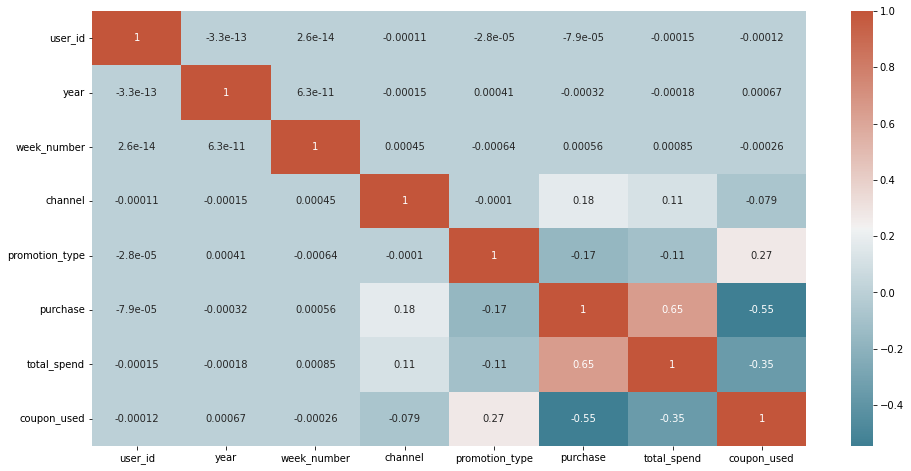

In [11]:
# calculate correlation matrix and plotting the heatmap
plt.figure(figsize = (16,8))
corr = df_offers_copy.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [24]:
#Fetching each type of promotion_type
offer_names=list(df_graph.promotion_type.unique())
print(offer_names)

['Free pastry', '20% discount', 'No notifications', 'Reminder only', 'Free drink', '10% discount']


In [38]:
# For a particular promotion type, how many of its coupons were used? how many its coupons were not used (purchase and coupon not used + no purchase and coupon not used)
#filtering for each promotion type where purchase is made and coupon is used
offer_coupon_used=[]
for offer_name in offer_names:
    filt = (df_graph['promotion_type'] == offer_name) & (df_graph['purchase'] == 't') & (df_graph['coupon_used'] == 't')
    offer_coupon_used.append(len(df_graph.loc[filt]['coupon_used']))
offer_coupon_used

[1192856, 701385, 0, 0, 1707621, 424404]

In [27]:
#total times a particular offer was rolled out
total_offer=[]
for offer_name in offer_names:
    filt = (df_graph['promotion_type'] == offer_name)
    total_offer.append(len(df_graph.loc[filt]['coupon_used']))
total_offer

[2596888, 2600346, 2599225, 2599008, 2596694, 2596087]

In [28]:
#filtering for each promotion type where purchase is made and coupon is not used
offer_coupon_not_used=[]
for offer_name in offer_names:
    filt = (df_graph['promotion_type'] == offer_name) & (df_graph['purchase'] == 't') & (df_graph['coupon_used'] == 'f')
    offer_coupon_not_used.append(len(df_graph.loc[filt]['coupon_used']))
offer_coupon_not_used

[595501, 700670, 1010658, 879949, 341623, 845104]

In [29]:
#filtering for each promotion type where purchase is not made and coupon is not used
offer_no_purchase=[]
for offer_name in offer_names:
    filt = (df_graph['promotion_type'] == offer_name) & (df_graph['purchase'] == 'f') & (df_graph['coupon_used'] == 'f')
    offer_no_purchase.append(len(df_graph.loc[filt]['coupon_used']))
offer_no_purchase

[808531, 1198291, 1588567, 1719059, 547450, 1326579]

In [36]:
offer_coupon_used+offer_coupon_not_used

[1192856,
 701385,
 1,
 1,
 1707621,
 424404,
 595501,
 700670,
 1010658,
 879949,
 341623,
 845104]

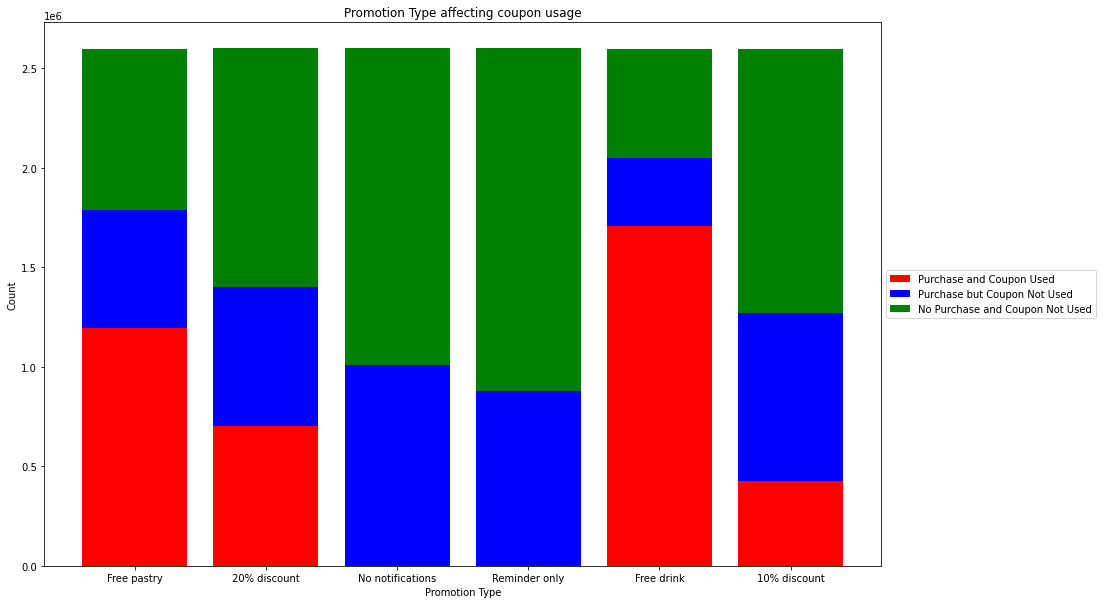

In [43]:
# plot bars in stacked manner
plt.subplots(figsize=(15, 10))
plt.bar(offer_names, offer_coupon_used, color='r')
plt.bar(offer_names, offer_coupon_not_used, bottom=offer_coupon_used, color='b')
plt.bar(offer_names, offer_no_purchase, bottom=np.array(offer_coupon_used)+np.array(offer_coupon_not_used), color='g')
plt.xlabel("Promotion Type")
plt.ylabel("Count")
plt.legend(["Purchase and Coupon Used", "Purchase but Coupon Not Used", "No Purchase and Coupon Not Used"],loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("Promotion Type affecting coupon usage")

plt.show()


In [45]:
#Trend of coupon used over 2 years with usage shown per week
#filtering data based on year 2020
df_used_2020 = df_graph[df_graph['year']==2020]
df_used_2020= df_used_2020.loc[:, df_used_2020.columns != 'year']

#2021
#filtering data based on year 2021
df_used_2021 = df_graph[df_graph['year']==2021]
df_used_2021= df_used_2021.loc[:, df_used_2021.columns != 'year']

In [58]:
trend_2020=pd.DataFrame({'coupon_utilised_count' : df_used_2020.groupby(['week_number', 'purchase', 'coupon_used'])['coupon_used'].size()}).reset_index()

In [59]:
trend_2020_used = trend_2020[(trend_2020['purchase'] == 't') & (trend_2020['coupon_used'] == 't')][['week_number', 'coupon_utilised_count']]

In [60]:
trend_2021=pd.DataFrame({'coupon_utilised_count' : df_used_2021.groupby(['week_number', 'purchase', 'coupon_used'])['coupon_used'].size()}).reset_index()
trend_2021_used = trend_2021[(trend_2021['purchase'] == 't') & (trend_2021['coupon_used'] == 't')][['week_number', 'coupon_utilised_count']]

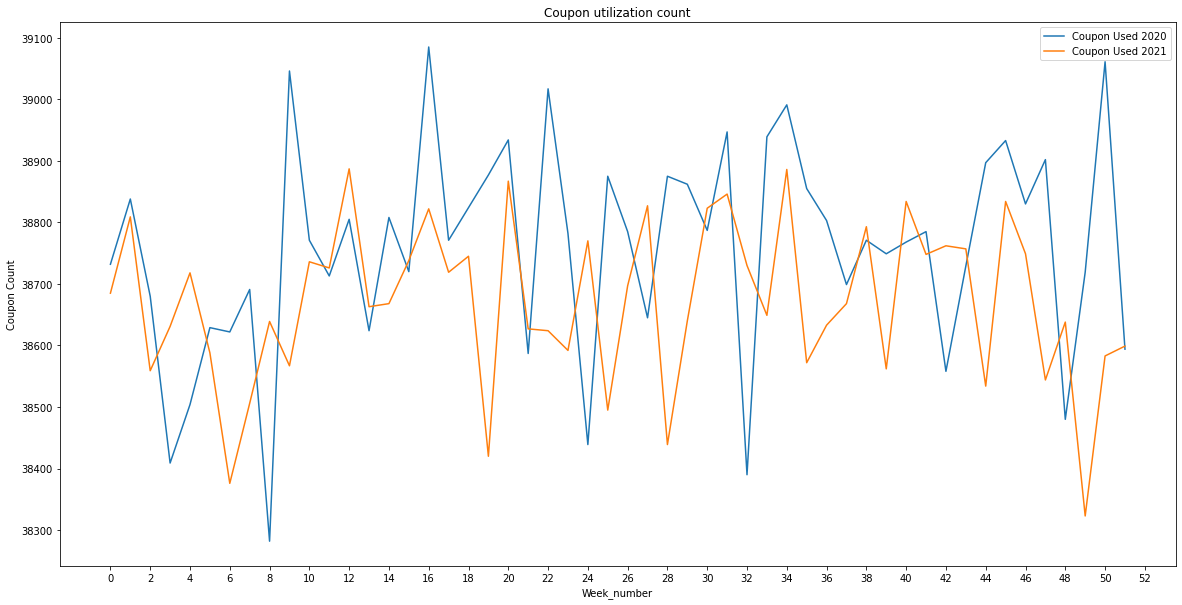

In [61]:
#plotting graph showing the trend of coupons used over 2 years per week
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(0, 53, 2.0))
plt.plot(trend_2020_used.week_number, trend_2020_used['coupon_utilised_count'], label = 'Coupon Used 2020')
plt.plot(trend_2021_used.week_number, trend_2021_used['coupon_utilised_count'], label = 'Coupon Used 2021')
plt.xlabel("Week_number")
plt.ylabel("Coupon Count")
plt.title("Coupon utilization count")
plt.legend()

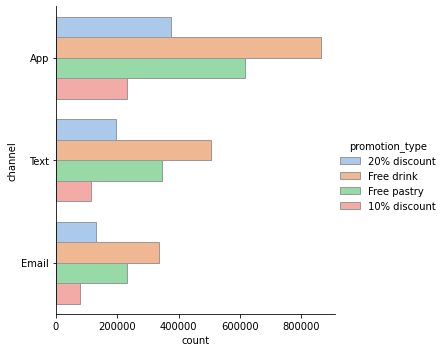

In [68]:
#Identifying which promotion type along with channel works best in terms of coupons used
promo_channel_combo = df_graph[(df_graph['purchase'] == 't') & (df_graph['coupon_used'] == 't')]
sns.catplot(y="channel", hue="promotion_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=promo_channel_combo)

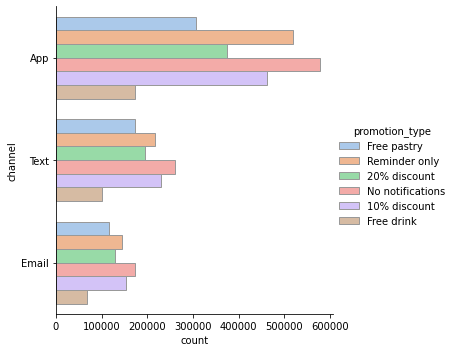

In [69]:
#Identifying which promotion type along with channel leads to coupon not used but purchase is still made
promo_channel_combo_false = df_graph[(df_graph['purchase'] == 't') & (df_graph['coupon_used'] == 'f')]
sns.catplot(y="channel", hue="promotion_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=promo_channel_combo_false)

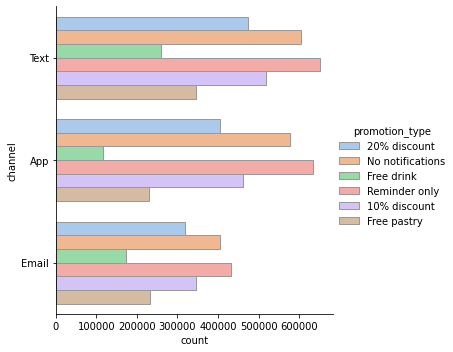

In [70]:
#Identifying which promotion type along with channel leads to coupon not used and purchase also not made
promo_channel_false = df_graph[(df_graph['purchase'] == 'f') & (df_graph['coupon_used'] == 'f')]
sns.catplot(y="channel", hue="promotion_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=promo_channel_false)

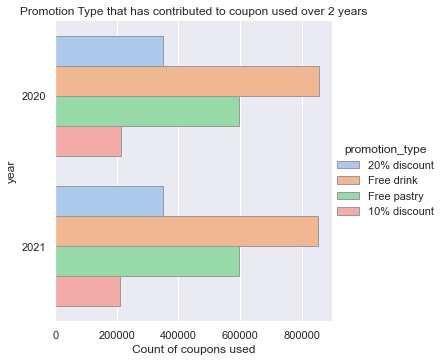

In [15]:
#To understand which promotion type has been successful in terms of coupon usage over the years
promo_year = df_graph[(df_graph['purchase'] == 't') & (df_graph['coupon_used'] == 't')]
sns.set(rc={'figure.figsize':(25,15)})
p = sns.catplot(y="year", hue="promotion_type", kind="count",
            palette="pastel", edgecolor=".6",
            data=promo_year).set(title="Promotion Type that has contributed to coupon used over 2 years", xlabel="Count of coupons used")
p.figure.savefig('Graph4.png',bbox_inches='tight')
